In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

2023-12-06 20:35:17.612398: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 20:35:17.663479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 20:35:17.663508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 20:35:17.664851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 20:35:17.672797: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 20:35:17.673711: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate synthetic daily time series data
def generate_daily_time_series(num_points=365, trend_slope=0.2, seasonality_amplitude=5, noise_std=2):
    time = np.arange(num_points)
    
    # Generate a linear trend
    trend = trend_slope * time
    
    # Generate seasonal component
    seasonality = seasonality_amplitude * np.sin(2 * np.pi * time / 365)
    
    # Generate random noise
    noise = np.random.normal(0, noise_std, num_points)
    
    # Combine components to get the final time series
    time_series = trend + seasonality + noise
    
    return time_series

In [4]:
# Generate synthetic daily time series data
num_points = 365
time_series_data = generate_daily_time_series(num_points)

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', periods=num_points, freq='D'),
                   'Stock': time_series_data})

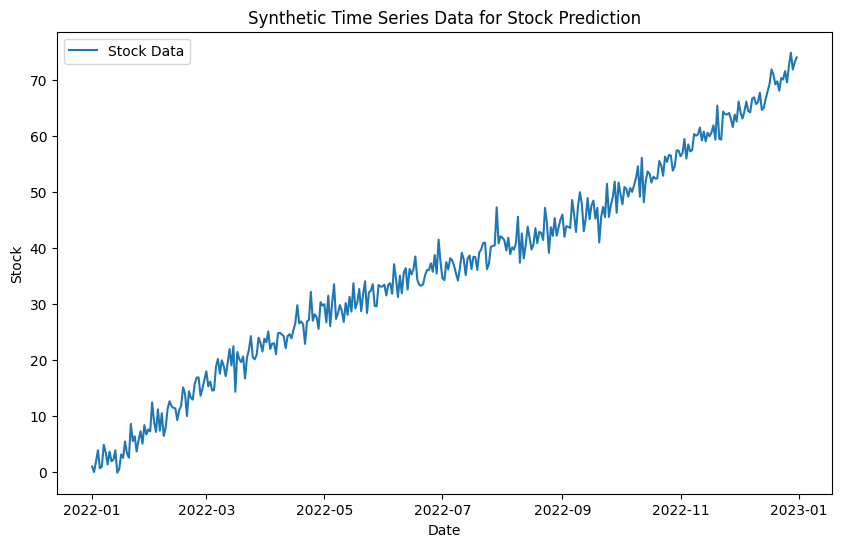

In [5]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Stock'], label='Stock Data')
plt.title('Synthetic Time Series Data for Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.legend()
plt.show()

In [6]:
# Save the data to a CSV file
df.to_csv('synthetic_stock_data.csv', index=False)

In [7]:
# Load the synthetic time series data
df = pd.read_csv('synthetic_stock_data.csv')

# Use the 'Stock' column as the target variable
data = df['Stock'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences and labels for training and testing
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences and labels for training and testing
seq_length = 20  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
8/8 [==============================] - 2s 50ms/step - loss: 0.1105 - val_loss: 0.2071
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0570 - val_loss: 0.0940
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0171 - val_loss: 0.0047
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0069
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.0092
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 10/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 8.4034e-04
Epoch 11/50
8/8 [========

In [32]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Invert the scaling for evaluation
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')

[[0.70074692]
 [0.74212885]
 [0.73204772]
 [0.70713041]
 [0.75266037]
 [0.73997689]
 [0.75657294]
 [0.75482856]
 [0.71910909]
 [0.7294488 ]
 [0.76748956]
 [0.76705021]
 [0.75345228]
 [0.760381  ]
 [0.79456895]
 [0.7480264 ]
 [0.78167018]
 [0.76501059]
 [0.76792523]
 [0.80635629]]
2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 4.080746960041821


[[58.783848]
 [59.2154  ]
 [59.612186]
 [60.15966 ]
 [60.318752]
 [60.69621 ]
 [60.76961 ]
 [61.07714 ]
 [61.228302]
 [61.51609 ]
 [61.936665]
 [61.873795]
 [62.76658 ]
 [62.59092 ]
 [62.528893]
 [63.177998]
 [63.642174]
 [64.032005]
 [64.45274 ]
 [64.6736  ]
 [64.632774]
 [64.959435]
 [65.01934 ]
 [65.61882 ]
 [65.8262  ]
 [65.87804 ]
 [66.16329 ]
 [66.636925]
 [66.782135]
 [66.900566]
 [67.3687  ]
 [67.822655]
 [67.95485 ]
 [68.248146]
 [68.76197 ]
 [68.64246 ]
 [68.67027 ]
 [68.93848 ]
 [69.341675]
 [69.90152 ]
 [70.81002 ]
 [71.40904 ]
 [71.73928 ]
 [72.11564 ]
 [72.21338 ]
 [72.71203 ]
 [73.05114 ]
 [73.57234 ]
 [73.72427 ]
 [74.387505]
 [75.24565 ]
 [75.500404]
 [76.0461  ]]


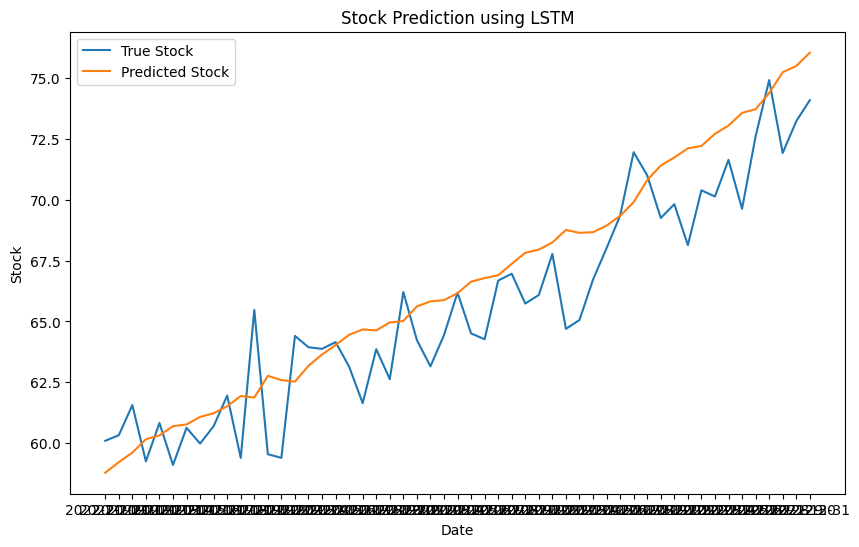

In [39]:
# Plot the results
print(y_pred_inv)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].values[train_size+seq_length:], y_test_inv, label='True Stock')
plt.plot(df['Date'].values[train_size+seq_length:], y_pred_inv, label='Predicted Stock')
plt.title('Stock Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.legend()
plt.show()